# Loan Data Exploration
## by Yun Yen Tsai

## Preliminary Wrangling

> This data set from Prosper contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [686]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [687]:
# load in the dataset 
df = pd.read_csv('prosperLoanData.csv')

In [688]:
# some of the columns were not available before July 2009, only select the observations after that
df = df[(df['ListingCreationDate'] >= '2009-07-01')]

In [689]:
# pick 11 variables that seem worth exploring
column_sub = ['Term','LoanStatus','BorrowerAPR','BorrowerRate',
'ProsperRating (numeric)','EmploymentStatus','EmploymentStatusDuration','StatedMonthlyIncome',
'LoanOriginalAmount','MonthlyLoanPayment','CurrentDelinquencies']
df_new = df[column_sub]

In [690]:
df_new.to_csv('df_new.csv',index=False)

In [691]:
df_new = pd.read_csv('df_new.csv')

In [692]:
# print the overview of the new dataset 
print(df_new.shape)
print(df_new.dtypes)
print(df_new.info())

(84853, 11)
Term                          int64
LoanStatus                   object
BorrowerAPR                 float64
BorrowerRate                float64
ProsperRating (numeric)     float64
EmploymentStatus             object
EmploymentStatusDuration    float64
StatedMonthlyIncome         float64
LoanOriginalAmount            int64
MonthlyLoanPayment          float64
CurrentDelinquencies        float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 11 columns):
Term                        84853 non-null int64
LoanStatus                  84853 non-null object
BorrowerAPR                 84853 non-null float64
BorrowerRate                84853 non-null float64
ProsperRating (numeric)     84853 non-null float64
EmploymentStatus            84853 non-null object
EmploymentStatusDuration    84834 non-null float64
StatedMonthlyIncome         84853 non-null float64
LoanOriginalAmount          84853 non-null int64
MonthlyLoanPayme

In [693]:
df_new.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,CurrentDelinquencies
0,36,Current,0.12016,0.0920,6.0,Employed,44.0,6125.000000,10000,318.93,0.0
1,36,Current,0.12528,0.0974,6.0,Employed,113.0,2875.000000,10000,321.45,4.0
2,36,Current,0.24614,0.2085,3.0,Employed,44.0,9583.333333,15000,563.97,0.0
3,60,Current,0.15425,0.1314,5.0,Employed,82.0,8333.333333,15000,342.37,0.0
4,36,Current,0.31032,0.2712,2.0,Employed,172.0,2083.333333,3000,122.67,0.0


In [694]:
# convert LoanStatus and ProsperRating into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Chargedoff', 'Cancelled', 'Defaulted', 'PastDue', 'Current', 'FinalPaymentInProgress', 'Completed'],
                    'ProsperRating (numeric)': [1,2,3,4,5,6,7]
                    ,'Term':[12,36,60]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_new[var] = df_new[var].astype(ordered_var)

### What is the structure of your dataset?

> There are 84853 listings in this loan dataset with 12 features.(Term, LoanStatus, BorrowerAPR, BorrowerRate, EstimatedLoss, ProsperRating(numeric), EmploymentStatus, EmploymentStatusDuration, StatedMonthlyIncome, LoanOriginalAmount, MonthlyLoanPayment, CurrentDelinquencies)

> Ordinal Categorical Variable <br />
(worst) ——> (best) <br />
- LoanStatus: Chargedoff, Cancelled, Defaulted, PastDue, Current, FinalPaymentInProgress, Completed <br />
- ProsperRating(numeric): 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA

> Nominal Categorical Variable
EmploymentStatus: Employed, Full-time, Self-employed, Part-time, Other, Not employed, Retired
Term: 12,36,60
### What is/are the main feature(s) of interest in your dataset?

> I'm interested in
- what affects the borrower's APR or interest rate 
- if delinquent or defaulted account have higher APR

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect term, Prosper rating and borrower rate will have higher effect on APR and interest, other variable will also impact the APR but in a smaller scale.

> As for the second point, I will be focus on employment data(EmploymentStatus, EmploymentStatusDuration, StatedMonthlyIncome) and CurrentDelinquencies first.

## Univariate Exploration

> In this section, I'm going to investigate distributions of individual variables.


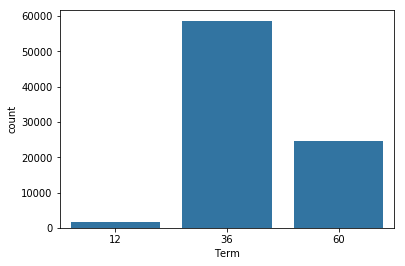

In [695]:
# plotting term on standard scale
base_color=sb.color_palette()[0]
sb.countplot(data=df_new,x='Term',color=base_color)

> There are three terms available for the borrowers,12,36 months and 60 months.<br />
We can see most users go for 36 or 60 months for the loan term.
 


Text(0.5, 0, 'BorrowerRate')

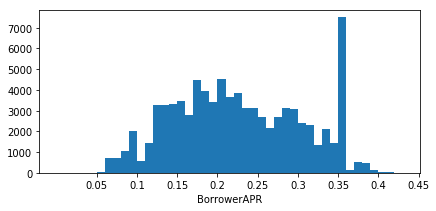

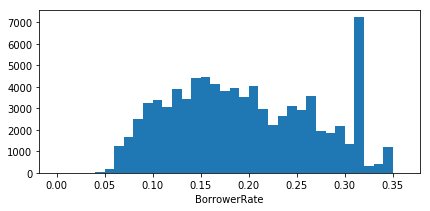

In [696]:
# plotting APR and BorrowerRate on standard scale



binsize = 0.01
APR_bins = np.arange(0, df_new['BorrowerAPR'].max()+binsize, binsize)
plt.figure(figsize=[15, 3])
plt.subplot(1,2,1)
plt.hist(data = df_new, x = 'BorrowerAPR', bins = APR_bins)
plt.xlabel('BorrowerAPR')
x_ticks = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
plt.xticks(x_ticks,x_ticks)


binsize = 0.01
Rate_bins = np.arange(0, df_new['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize=[15, 3])
plt.subplot(1,2,2)
plt.hist(data = df_new, x = 'BorrowerRate', bins = Rate_bins)
plt.xlabel('BorrowerRate')




>We can see the borrower APR and interest rate have similar distribution, they are both generally one modal with low skewness, but there's one bin with over 7000 listings appear on the right side.
However, APR includes other fees like origination and check fee, so the distribution spreads wider.

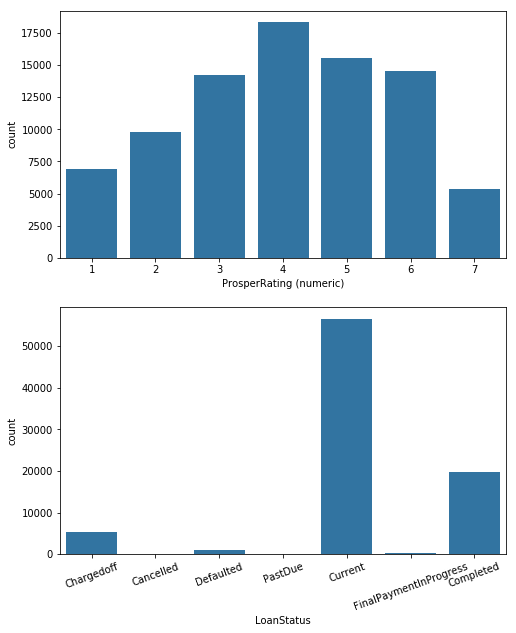

In [697]:
# plotting ProsperRating and LoanStatus on standard scale
fig, ax = plt.subplots(nrows=2, figsize = [8,10])
base_color = sb.color_palette()[0]
plt.xticks(rotation=20)
sb.countplot(data = df_new, x = 'LoanStatus', color = base_color, ax = ax[1])
sb.countplot(data = df_new, x = 'ProsperRating (numeric)', color = base_color, ax = ax[0])

> The distribution of prosper rating is quite close to normal distribution,the highest count is rating 4 and gradually decrease as the ratings go higher or lower.
<br />The second chart shows the loan status, most of the loans are now current or completed, although there are still some being defaulted or chargedoff.

(0, 20000)

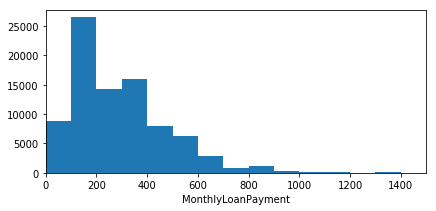

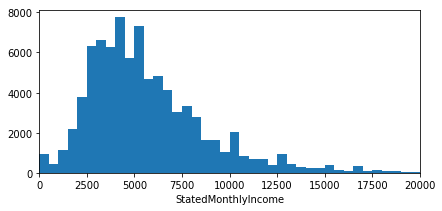

In [698]:
# plotting MonthlyLoanPayment and StatedMonthlyIncome on standard scale
binsize = 100
pay_bins = np.arange(0, df_new['MonthlyLoanPayment'].max()+binsize, binsize)
plt.figure(figsize=[15, 3])
plt.subplot(1,2,1)
plt.hist(data = df_new, x = 'MonthlyLoanPayment', bins = pay_bins)
plt.xlabel('MonthlyLoanPayment')
plt.xlim(0,1500)

binsize_1 = 500
income_bins = np.arange(0, df_new['StatedMonthlyIncome'].max()+binsize_1, binsize_1)
plt.figure(figsize=[15, 3])
plt.subplot(1,2,2)
plt.hist(data = df_new, x = 'StatedMonthlyIncome', bins = income_bins)
plt.xlabel('StatedMonthlyIncome')
plt.xlim(left=0,right=20000)



> Both of them are right-skewed and a  bit long-tailed, so I will try to apply log transformation on them.

([<matplotlib.axis.XTick at 0x234f7db38>,
 <a list of 6 Text xticklabel objects>)

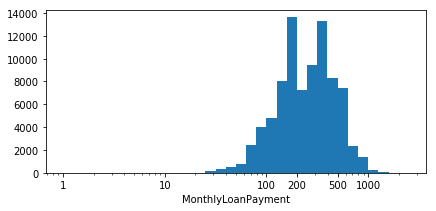

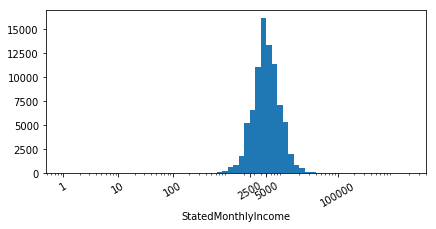

In [699]:
# plotting log transformed MonthlyLoanPayment and StatedMonthlyIncome on standard scale
log_binsize = 0.1
pay_bins = 10 ** np.arange(0, np.log10(df_new['MonthlyLoanPayment'].max())+log_binsize, log_binsize)
plt.figure(figsize=[15, 3])
plt.subplot(1,2,1)
plt.hist(data = df_new, x = 'MonthlyLoanPayment', bins = pay_bins)
plt.xscale('log')
plt.xlabel('MonthlyLoanPayment')
x_ticks = [1,10,100,200,500,1000]
plt.xticks(x_ticks,x_ticks)


log_binsize = 0.1
income_bins = 10 ** np.arange(0, np.log10(df_new['StatedMonthlyIncome'].max())+log_binsize, log_binsize)
plt.figure(figsize=[15, 3])
plt.subplot(1,2,2)
plt.hist(data = df_new, x = 'StatedMonthlyIncome', bins = income_bins)
plt.xscale('log')
plt.xlabel('StatedMonthlyIncome')
x_ticks = [1,10,100,2500,5000,100000]
plt.xticks(x_ticks,x_ticks,rotation=30)


>After log transformation, they are more close to bell shape. <br />
The peak for monthly loan payment appears from 100-200, while the majority of borrowers receive 2500-5000 per month. 

(-0.5, 10)

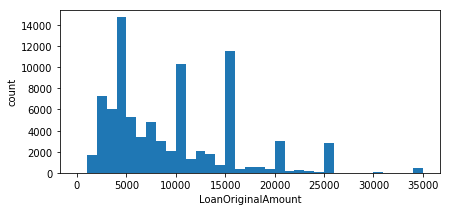

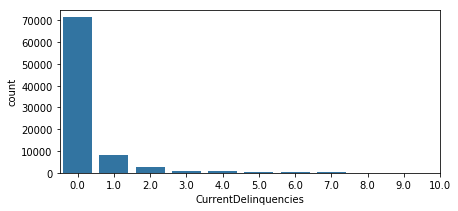

In [700]:
# plotting LoanOriginalAmount and CurrentDelinquencies on standard scale
binsize_1 = 1000
income_bins = np.arange(0, df_new['LoanOriginalAmount'].max()+binsize_1, binsize_1)
plt.figure(figsize=[15, 3])
plt.subplot(1,2,1)
plt.hist(data = df_new, x = 'LoanOriginalAmount', bins = income_bins)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('count')

base_color = sb.color_palette()[0]
plt.figure(figsize=[15, 3])
plt.subplot(1,2,2)
sb.countplot(data = df_new, x = 'CurrentDelinquencies',color=base_color)
plt.xlabel('CurrentDelinquencies')
plt.xlim(right=10)

> We can see that the loan original amount has some large spikes at the mutiples of 5000, probably because these number are easier to remember and less likely to get confused.

>As for the delinqunecy number, most of the users only have one or no delinquent account at the moment, there are only few borrowers that have more than one delinquencies.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The histogram for APR and rate has an tall spike on the right side of the plot, to understand why this is the case, I will explore more in the following section.<br />

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  The distirbution for the monthly loan payment and monthly income are right skewed and a bit long tailed,<br/>
so I've applied log transformation on both of them, after that the distribtion looks more close to the normal.

## Bivariate Exploration

> First of all, I want to look at the corralation between each vaiable.

In [701]:
# sort all the variable into two two groups
numeric_vars = ['BorrowerAPR','BorrowerRate',
               'EmploymentStatusDuration','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','CurrentDelinquencies']
categoric_vars = ['Term','LoanStatus','ProsperRating (numeric)','EmploymentStatus']

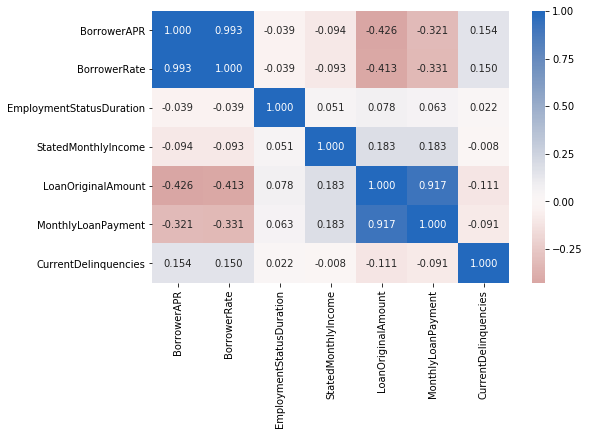

In [702]:
# correlation plot for numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(df_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

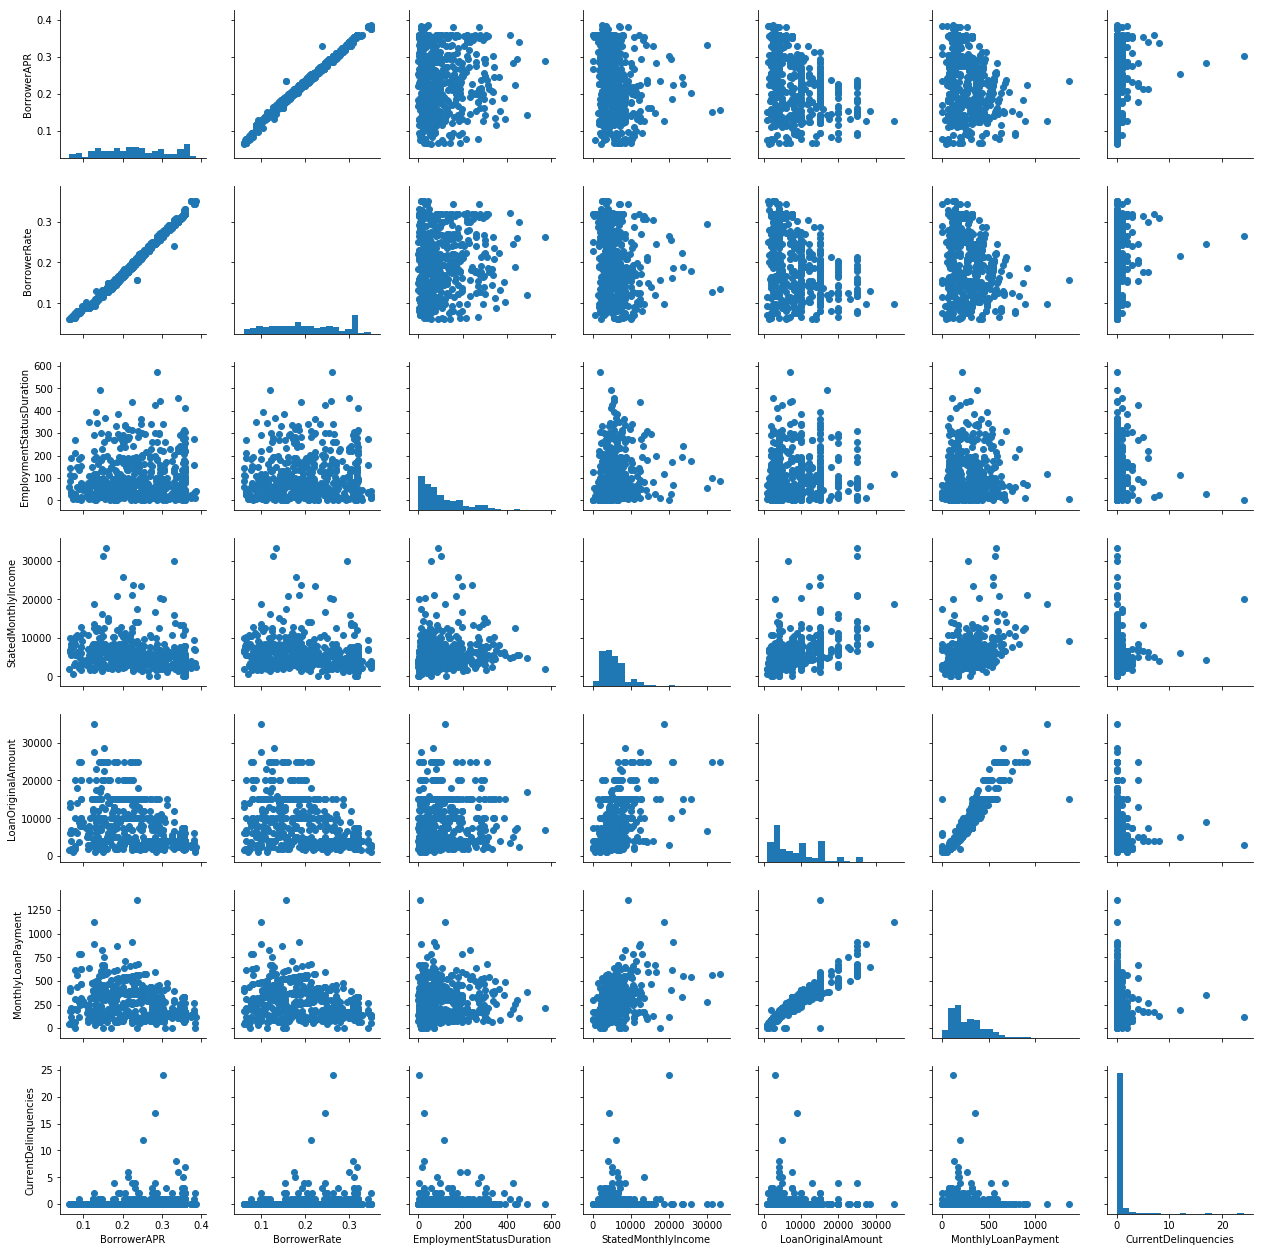

In [703]:
# plot matrix(numeric vars): sample 500 loans so it's clearer
samples = np.random.choice(df_new.shape[0], 500, replace = False)
loan_samp = df_new.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

> As expected, Borrower Rate has the strongest positive relationship with APR, since APR is made up of interest rate and fees.<br /><br />
Also, it seems that APR has weak negtive correlations between monthly loan payment and loan original amount, and they have a strong positive correlation with each other. (monthly loan payment and loan original amount)  <br />
In the following parts, I will explore more on these numeric vars.


//anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

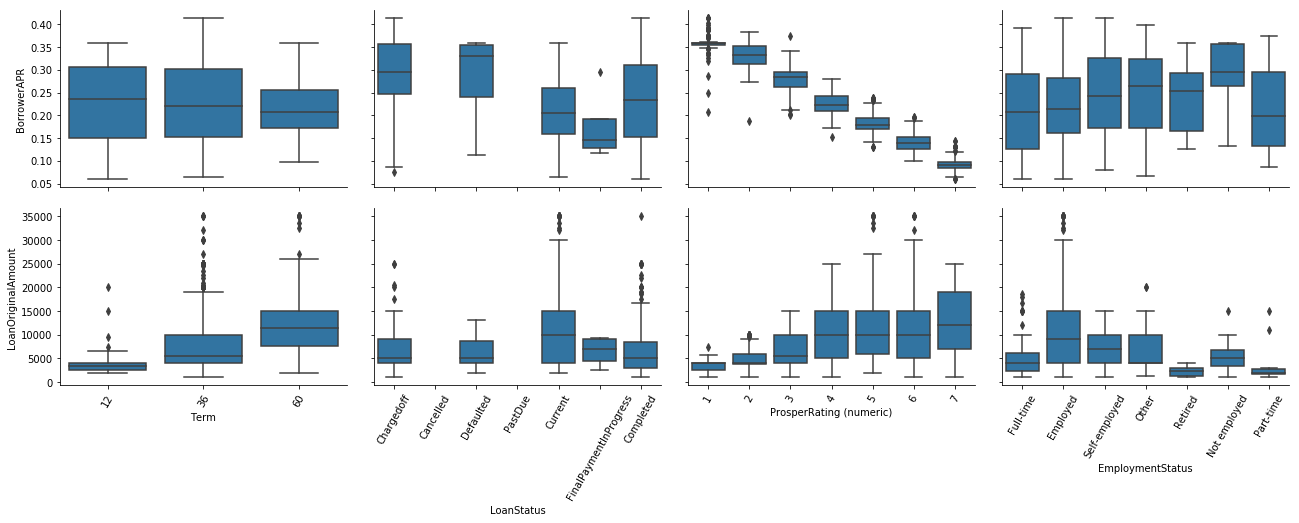

In [704]:
# plot matrix of numeric features against categorical features
# use a larger sample this time since there are fewer plots

samples = np.random.choice(df_new.shape[0], 2000, replace = False)
loan_samp = df_new.loc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=60)
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR','LoanOriginalAmount'], x_vars = categoric_vars,
               size = 3, aspect = 1.5)

g.map(boxgrid)

plt.show();

>APR :
- tthe effect of terms is more obvious when they are longer.
- a larger proprotion of defaulted and chargedoff loans having higher APR than the current accounts.
- an obvious negative relationship can be found in the prosper rating plot, as the rating goes higher the APR goes lower.
- Not employed borrowers have a higher APR than other employment status.

>Loan Original Amount:
- longer terms usually come with higher original amount
- surprisingly, there are more customers with higher rating borrow larger amount of money 
- the loan original amount of employed customers are generally higher than the non-employed 

> APR & Loan Original Amount:
- an opposite trend in the Term, Loan Status and Prosper Rating plots between APR and original amount, and it further proves that they have negative correlation as we found from the cells above.



//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


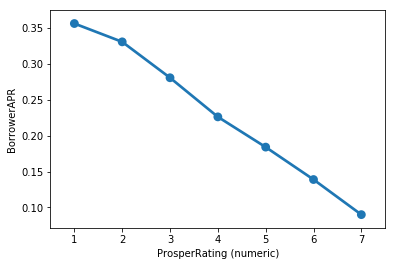

In [705]:
# APR vs. Prosper rating
sb.pointplot(data=df_new,x='ProsperRating (numeric)',y='BorrowerAPR')

(0.0, 2000)

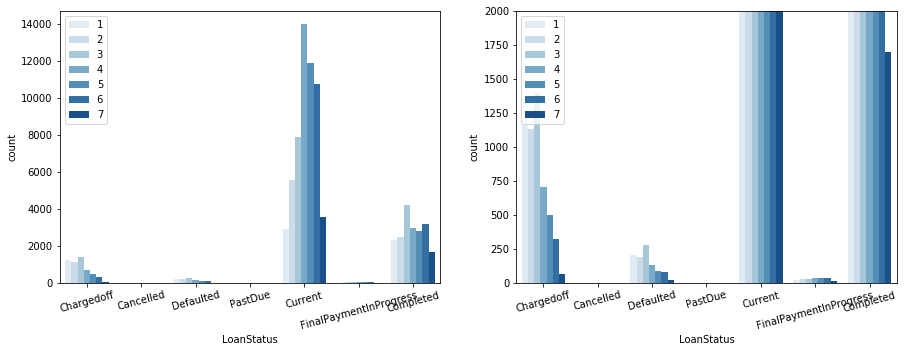

In [706]:
# subplot 1: Loan status vs. Prosper rating

plt.figure(figsize = [15,5])

plt.subplot(1, 2, 1)
sb.countplot(data = df_new, x = 'LoanStatus', hue = 'ProsperRating (numeric)', palette = 'Blues')
plt.xticks(rotation=15)
plt.legend(loc = 2)

plt.subplot(1, 2, 2)
sb.countplot(data = df_new, x = 'LoanStatus', hue = 'ProsperRating (numeric)', palette = 'Blues')
plt.xticks(rotation=15)
plt.legend(loc = 2)
plt.ylim(top=2000)

>There are more higher rating custormers whose debt is current or completed
<br />, and more low rated loans exist in the defaulted and chargeoff.

(0.0, 1800)

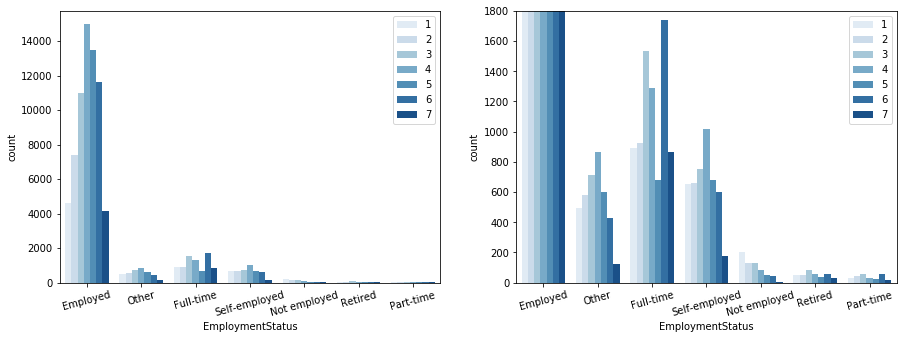

In [707]:
# subplot 2: Employment staus vs. Prosper rating
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = df_new, x = 'EmploymentStatus', hue = 'ProsperRating (numeric)', palette = 'Blues')
plt.xticks(rotation=15)
plt.legend(loc = 0)

plt.subplot(1, 2, 2)
sb.countplot(data = df_new, x = 'EmploymentStatus', hue = 'ProsperRating (numeric)', palette = 'Blues')
plt.xticks(rotation=15)
plt.legend(loc = 0)
plt.ylim(top=1800)

> We can see more employed users' rating are above 3.
 <br />Turning to the zoomed in chart on the right, more not employed users can be seen on the lower end of the scale.

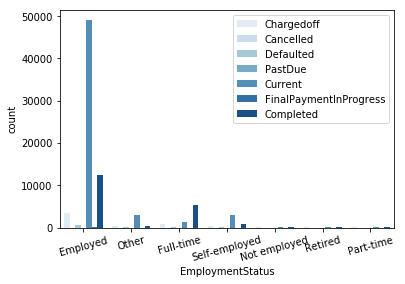

In [708]:
# subplot 3: Loan status vs. Employment Status
sb.countplot(data = df_new, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Blues')
plt.xticks(rotation=15)
plt.legend(loc = 1)


>It can be seen that the transactions of employed users are mostly current or completed.

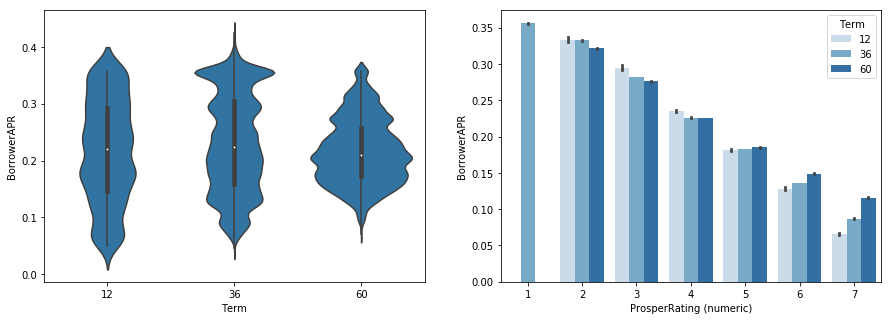

In [709]:
# Term vs. APR vs. ProsperRating 
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.violinplot(data = df_new, x = 'Term', y = 'BorrowerAPR', color = base_color)

plt.subplot(1,2,2)
g = sb.barplot(data = df_new, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'Term',palette='Blues')



> On the violin plot we can see longer term like 60 months does not get higher APR for its risk, and the average rate it's even lower than the 60 month.<br />
However, on the right side of the chart, this trend only appear before **level 4**, ratings after that get higher APR for longer periods.<br />
<br /> 
Also, I presume the peak(around 0.36) show on the term 36 and the high amount of 36 months loan is the reason why the APR has an extremely high spike on the right side of the distribution.

 

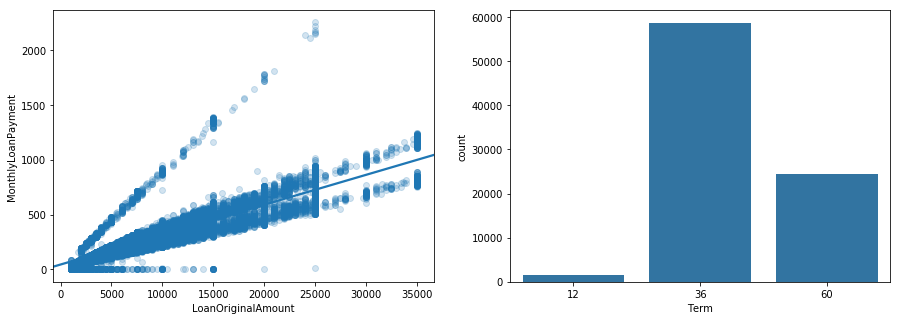

In [710]:
# MonthlyLoanPayment vs. LoanOriginalAmount
plt.figure(figsize = [15, 5])
plt.subplot(1,2,1)
sb.regplot(data = df_new, x = 'LoanOriginalAmount',y = 'MonthlyLoanPayment',scatter_kws={'alpha':0.2})

plt.subplot(1,2,2)
base_color=sb.color_palette()[0]
sb.countplot(data=df_new,x='Term',color=base_color)

> We can see three pair of linear relationship, I presume it's because of the loan term, which only have three options availabel. 
So the most dense line can be loan under 36 months period.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Prosper rating has an strong negative raletionship with APR, the higher the rating the lower the APR.
- APR may be able to indicate loan status: <br />
Lower APR(High Prosper rating) users may have higher possibility of having defaulted or chargeoff account,  <br />whereas higher APR(Low Prosper rating) users own more current or completed loans.
- Employment Status can be a factor when deciding APR, since umemployed borrowers tend to be charged higher rate.
- APR & LoanOriginalAmount have moderate negative relationship, when plotting with some categorical variable they show an opposite pattern.
- longer term does not necessarily mean higher APR, average rate for the 60 months is actually lower than that for the 36 months.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Three linear relationship can be found in MonthlyLoanPayment vs. LoanOriginalAmount plot. <br />
I presume it's caused by the available term options for borrower, which is 12,36 and 60 months.
<br/>
The APR spike I found it interesting in the last section can be related to the peak on the 36 months loan's APR distribution, it's also around 0.36 which  

## Multivariate Exploration
Next, I want to explore categorcial variables like LoanStatus and EmploymentStatus to see how they play into the relationship with ProsperRating and BorrowerAPR.

Text(0.5, 1.0, 'Average APR under different Prosper rating and loan status')

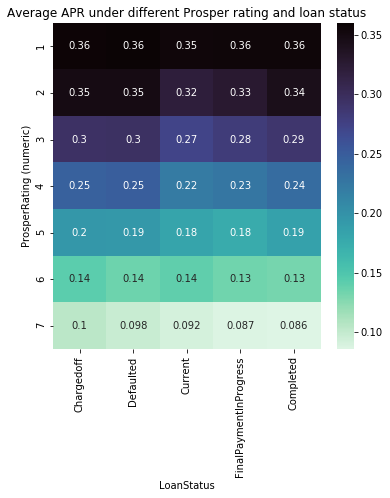

In [711]:
# LoanStatus vs. ProsperRate vs. BorrowerAPR
APR_mean = df_new.groupby(['LoanStatus','ProsperRating (numeric)']).mean()['BorrowerAPR']
APR_mean = APR_mean.reset_index(name='Average APR')
APR_mean = APR_mean.dropna()
APR_mean = APR_mean.pivot(index='ProsperRating (numeric)',columns='LoanStatus',values='Average APR')


plt.figure(figsize = [6, 6])
sb.heatmap(APR_mean,annot=True,cmap='mako_r')
plt.title('Average APR under different Prosper rating and loan status')


> Looking firstly at the x axis of this heat map, overall current loan does have slightly lighter color(lower APR) than Defaulted and Chargeddoff.  As for the for the prosper rating, it is clear that no matter what loan stauts it's in, the lower rating side has much deeper color.(higher APR)
<br />And this further shows how these two variables affect or are affected by the APR.

//anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(1, 53.91016234309885)

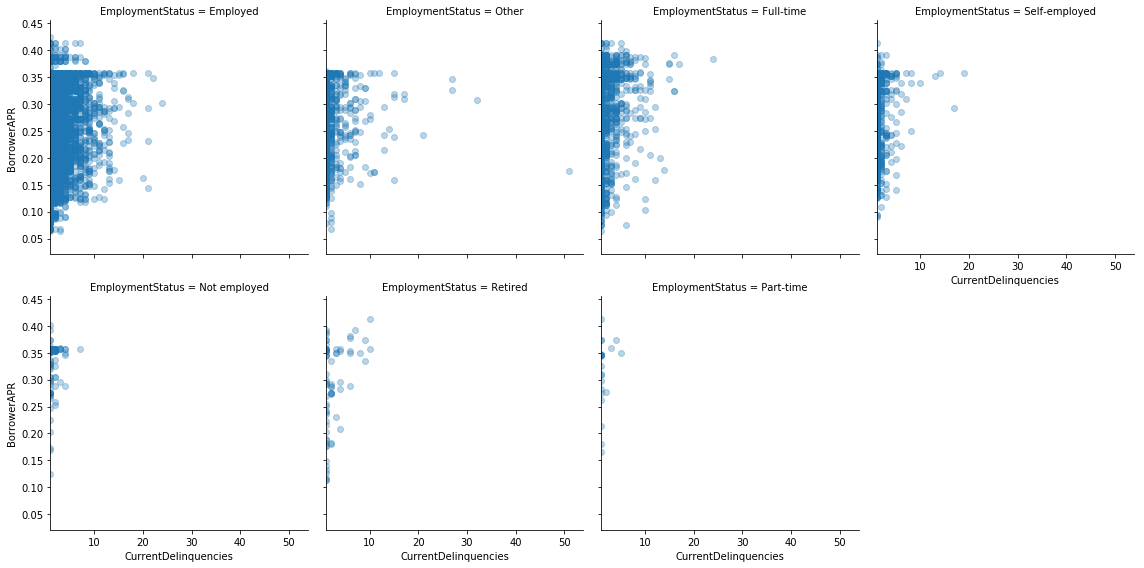

In [712]:
# CurrentDelinquencies vs. EmploymentStatus vs. BorrowerAPR
g = sb.FacetGrid(data=df_new,col='EmploymentStatus',size=4,col_wrap=4)
g.map(plt.scatter,'CurrentDelinquencies','BorrowerAPR',alpha=0.3)
plt.xlim(left=1)

> The scatter plot shows the effect of APR and employment status to current delinquencies.
Compared to the first row, the second row has obviously lower delinquencies, 
<br />which means unemplyed borrowers actually have much lower delinquent account number than the employed group.
<br />Since the parameter sizes between each group are very different, so I will take same amount of sample from each group again.


Text(0.5, 1.0, 'Delinquencies of Unemployed Borrowers')

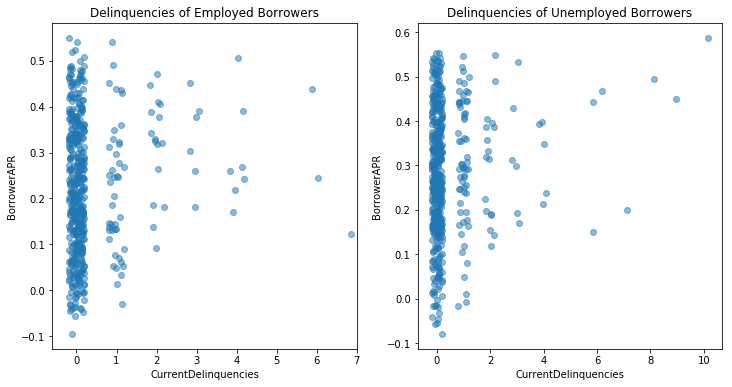

In [713]:
#Sampled CurrentDelinquencies vs. EmploymentStatus vs. BorrowerAPR
em_samp = df_new[(df_new['EmploymentStatus'] == "Employed") | (df_new['EmploymentStatus'] == "Full-time") | (df_new['EmploymentStatus'] == "Self-employed")]
unem_samp = df_new[(df_new['EmploymentStatus'] == "Not employed") | (df_new['EmploymentStatus'] == "Retired")]
em_samp = em_samp.reset_index()
unem_samp = unem_samp.reset_index()

em_samples = np.random.choice(em_samp.shape[0], 500, replace = False)
em_samp = em_samp.loc[em_samples,:]

unem_samples = np.random.choice(unem_samp.shape[0], 500, replace = False)
unem_samp = unem_samp.loc[unem_samples,:]

plt.figure(figsize = [12, 6])
plt.subplot(1, 2, 1)
sb.regplot(data = em_samp, x = 'CurrentDelinquencies',y='BorrowerAPR',fit_reg=False,scatter_kws={'alpha':0.5},x_jitter=0.2,y_jitter=0.2)
plt.xlim(right=7)
plt.title('Delinquencies of Employed Borrowers')


plt.subplot(1, 2, 2)
sb.regplot(data = unem_samp, x = 'CurrentDelinquencies',y='BorrowerAPR',fit_reg=False,scatter_kws={'alpha':0.5},x_jitter=0.2,y_jitter=0.2)
plt.title('Delinquencies of Unemployed Borrowers')



> The number of delinquencies of employed and unemployed borrowers look more or less the same.
 But the dots on the unemployed side are more dense on the higher APR end, while on the employed side they spread more evenly.

In [ ]:
# APR vs. ProsperRating vs. EmploymentStatus vs. Term
df_em = (df_new['EmploymentStatus'] == "Employed") | (df_new['EmploymentStatus'] == "Full-time") | (df_new['EmploymentStatus'] == "Self-employed")
df_em = df_new.loc[df_em,:]

df_unem = (df_new['EmploymentStatus'] == "Not employed") | (df_new['EmploymentStatus'] == "Retired")
df_unem = df_new.loc[df_unem,:]

plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
g = sb.barplot(data = df_em, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'Term',palette='Blues')
plt.title('Employed Borrowers across prosper rating & APR')

plt.subplot(1,2,2)
g = sb.barplot(data = df_unem, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'Term',palette='Blues')
plt.legend(loc=1,title='Term')
plt.title('Unemployed Borrowers across prosper rating & APR')


> Looking firstly at the right side of the plot, most of unemployed borrowers have higher rate for longer term,<br /> this is also the case for the left side plot after rating4,while there's an opposite pattern from rating 1-4.<br />
This means employed borrowers but low-rated customers tend to get higher rates for shorter period, and unemployed custormers get a much higher rate for longer period.<br />
<br />
Another worth noting thing is that on the both side of the chart the APR decreases as the Prosper rating goes higher.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the last part, I expand the exploration by looking at all the variables that affects APR. <br />
I mainly focus on how loan status, employment status and term affect APR across different prosper rating levels.<br />
Firstly, we see the defaulted accounts do have higher APR than the current one, but the gap decreases as the prosper rating goes higher.<br />
<br />
The scatter plot for employed and unemployed borrowers shows that there's only really small difference of current delinquencies between two employment status, but we still can see the umemployed group get higher APR here.
<br /><br />
Finally, on the employed side of last bar chart, the low rated employed users get **higher APR** for **shorter term**, but **higher APR** was given to the **longer period** for high rated listings.
<br /><br />
On the not employed side, the rate has increased as the term becomes longer, the difference between 35 months and 60 months is clearly larger than the employed side, which also indicates lenders have to take higher risk.


### Were there any interesting or surprising interactions between features?

> One  interesting thing is that there is actually no big difference of delinquencies between employed and unemployed custormer, in fact, the employed borrowers have slightly higher average dilinquencies.<br /><br />
Also, the APR is actually higher for short term when the employed users are rated between 1-4.<br /><br />